In [21]:
import numpy as np
from mkutils import create_fig, save_to_file
import copy
import matplotlib as plt

In [22]:
#profile = np.loadtxt('bsResult.xvg', comments=['@', '#'])
profile = np.loadtxt('profile.xvg', comments=['@', '#'])
histo = np.loadtxt('histo.xvg', comments=['@', '#'])
frames = np.loadtxt('frames.dat', skiprows=4, usecols=[0,1])
complete = np.loadtxt('complete.txt')
#frames = np.concatenate((frames, frames_hf))
frames = [item for item in frames if item[0] in complete]


C0 : frame 2760, distance: 5.702
C1 : frame 2770, distance: 5.798
C2 : frame 2805, distance: 5.897
C3 : frame 2808, distance: 5.989
C4 : frame 2845, distance: 6.085
C5 : frame 2848, distance: 6.160
C6 : frame 2865, distance: 6.259
C7 : frame 2889, distance: 6.354
C8 : frame 2918, distance: 6.532
C9 : frame 2941, distance: 6.619




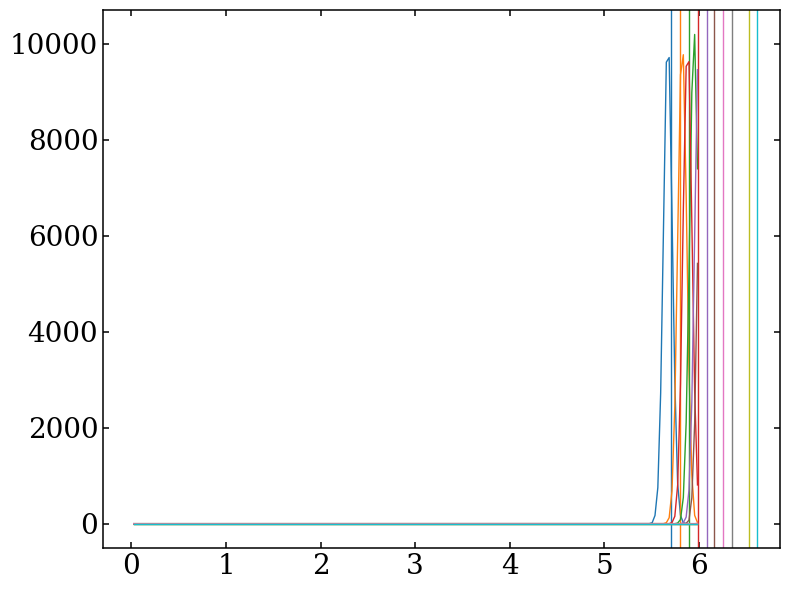

In [59]:
fig, axes = create_fig(1, 1)
ax = axes[0]
j = 130
for i, (frame, distance) in enumerate(frames[j:]): 
    distance=abs(distance)
    ci = int(i - (np.floor(i/10) * 10))
    ax.plot(histo[:, 0], histo[:, j+i+1], color='C{:d}'.format(ci))
    ax.axvline(x=distance, color='C{:d}'.format(ci))
    print('C{:d} : frame {:d}, distance: {:.3f}'.format(ci, int(frame), distance))
    if i == 9:
        break
print('\n')



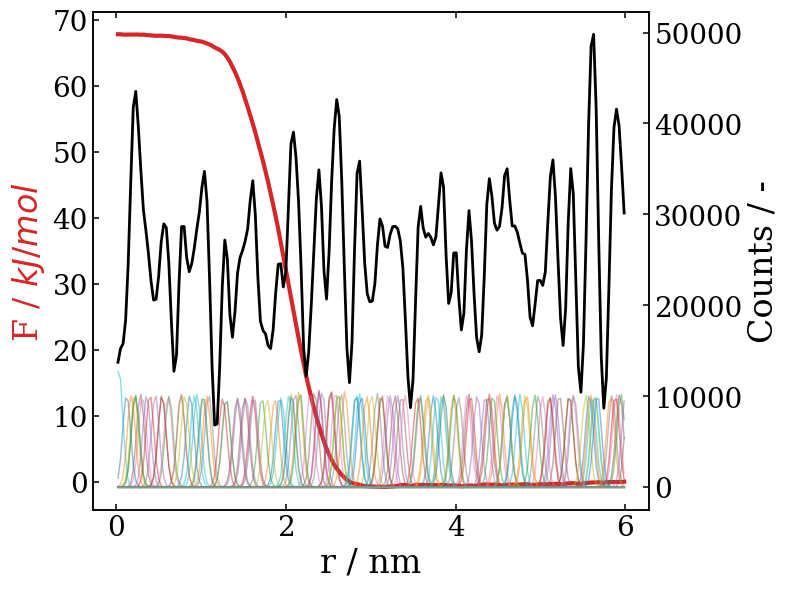

In [24]:
histofig, ax = create_fig(1,1)
ax = ax[0]

ax2 = ax.twinx()
cor_prof = copy.deepcopy(profile)
cor_prof[:, 1] += 2.*np.log(cor_prof[:, 0])
#ax.errorbar(profile[:,0], profile[:,1], profile[:,2], capsize=2, color='C3', lw=3)
ax.errorbar(profile[:,0], profile[:,1], capsize=2, color='C3', lw=3)

#ax.errorbar(cor_prof[:,0], cor_prof[:,1]-np.amin(cor_prof[:,1]), profile[:,2], capsize=2, color='C3', lw=3)

cum_hist = np.zeros((histo[:, :2].shape))
cum_hist[:, 0] = histo[:, 0]
for i in range(1,len(histo[0,:])):
    ax2.plot(histo[:,0], histo[:,i], alpha=0.5)
    cum_hist[:, 1] += histo[:, i]
    
ax2.plot(cum_hist[:, 0], cum_hist[:,1], color='k', lw=2)
ax.set_xlabel('r / nm')
ax.set_ylabel('F / $kJ/mol$', color='C3')
ax2.set_ylabel('Counts / -')
save_to_file('PMF_COUNT')

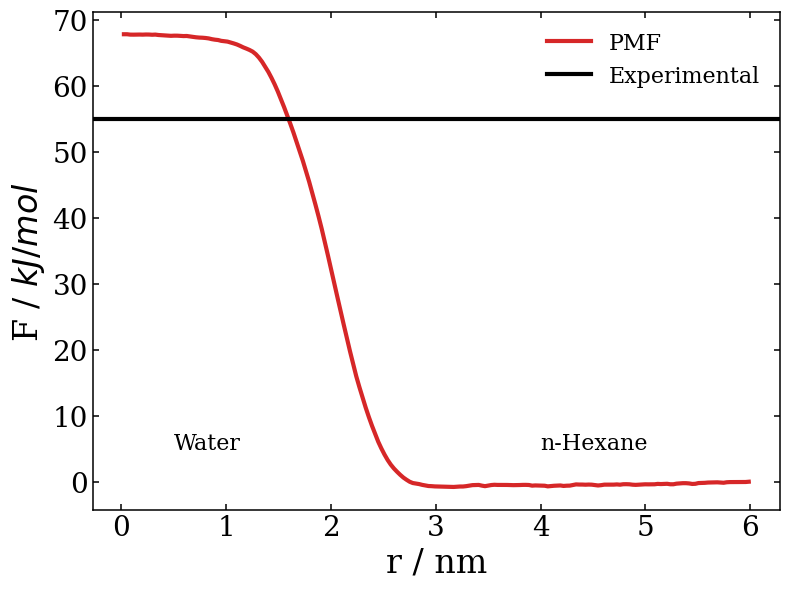

In [27]:
histofig, ax = create_fig(1,1)
ax = ax[0]

#ax.errorbar(profile[:,0], profile[:,1], profile[:,2], capsize=2, color='C3', lw=3, label='PMF')
ax.plot(profile[:,0], profile[:,1],  color='C3', lw=3, label='PMF')
ax.axhline(54.86, *ax.get_xlim(), lw=3, color='k', label='Experimental')
fontdict={'fontsize':16}
ax.text(4, 5, 'n-Hexane', fontdict=fontdict)
ax.text(0.5, 5, 'Water', fontdict=fontdict)
ax.set_xlabel('r / nm')
ax.set_ylabel('F / $kJ/mol$')
ax.legend()
save_to_file('F')

In [26]:
profile[-1,:]

array([5.985025, 0.      ])